In [1]:
import keras
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
x_train = train_images.reshape((60000,28*28))/255
y_train = to_categorical(train_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu'))
net.add(layers.Dense(10, activation='softmax'))
net.compile(optimizer='rmsprop', loss='categorical_crossentropy')
net.fit(x_train, y_train, epochs=5, batch_size=128)
print('done')

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2557
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1035
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0684
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0500
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0383
done


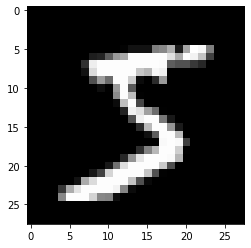

In [4]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')
plt.show()

In [5]:
!pip install tensorflowjs

     |████████████████████████████████| 71kB 5.1MB/s 
     |████████████████████████████████| 112kB 8.3MB/s 
  Found existing installation: tensorflow-hub 0.10.0
    Uninstalling tensorflow-hub-0.10.0:
      Successfully uninstalled tensorflow-hub-0.10.0


In [6]:
# 참고할만한 공식문서
# https://www.tensorflow.org/js/tutorials/conversion/import_keras
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(net, '.')
print('done')

done


/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


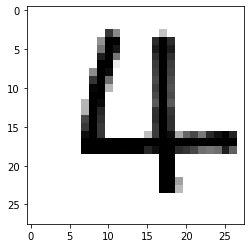

In [8]:
from PIL import Image
img = Image.open('canvas_img.png')
plt.imshow(img, cmap='gray')
plt.show()

In [9]:
import numpy as np
data = np.array(img)[:,:,3].reshape((1,-1))/255
output = net.predict(data)
print(output)
result = output.argmax(1)
print(result)

[[2.2976496e-06 6.7983930e-12 3.5054642e-03 7.3289236e-11 9.9647909e-01
  3.5612427e-06 9.6372232e-06 2.7468779e-08 1.3263653e-10 1.1576147e-08]]
[4]
